In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 8
matplotlib.rcParams['figure.figsize'] = (6, 4)
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [4]:
df=pd.read_csv(r'PJME_hourly.csv')

In [78]:
df1=pd.read_csv(r'PJME_hourly.csv')

In [102]:
Time_series_df=df1.copy()

In [103]:
Time_series_df.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [104]:
Time_series_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145366 entries, 0 to 145365
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  145366 non-null  object 
 1   PJME_MW   145366 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


In [105]:
Time_series_df.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [106]:
import datetime


In [107]:
Time_series_df['Datetime'] = pd.to_datetime(Time_series_df['Datetime'])

In [108]:
def get_date_stuff(val):
    year = val.year
    month = val.month
    day_of_the_month = val.day
    hour = val.hour
    day_of_the_week = val.dayofweek
    day_of_the_year = val.dayofyear
    week_of_the_year = val.weekofyear
    quartile = val.quarter
    return year, month, day_of_the_month, hour, day_of_the_week, day_of_the_year, week_of_the_year, quartile

# Apply the function to extract date components and create new columns
Time_series_df['Year'], Time_series_df['Month'], Time_series_df['Day_of_the_month'], Time_series_df['Hour'], \
Time_series_df['Day_of_the_week'], Time_series_df['Day_of_the_year'], Time_series_df['Week_of_the_year'], \
Time_series_df['Quartile'] = zip(*Time_series_df['Datetime'].apply(get_date_stuff))

In [97]:
a=Time_ser2.iloc[0][0]
a.quarter

4

In [112]:
Time_series_df.head()

,Datetime,PJME_MW,Year,Month,Day_of_the_month,Hour,Day_of_the_week,Day_of_the_year,Week_of_the_year,Quartile
0,2002-12-31 01:00:00,26498.0,2002,12,31,1,1,365,1,4
1,2002-12-31 02:00:00,25147.0,2002,12,31,2,1,365,1,4
2,2002-12-31 03:00:00,24574.0,2002,12,31,3,1,365,1,4
3,2002-12-31 04:00:00,24393.0,2002,12,31,4,1,365,1,4
4,2002-12-31 05:00:00,24860.0,2002,12,31,5,1,365,1,4


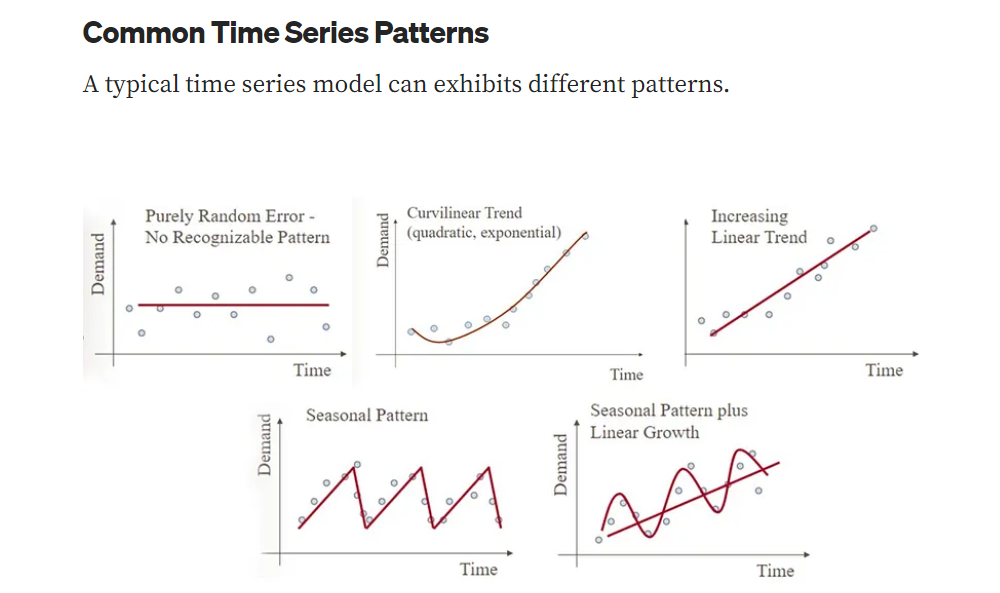

reference: https://engineering.99x.io/time-series-forecasting-in-machine-learning-3972f7a7a467

In [74]:
df['Datetime']=pd.to_datetime(df['Datetime'])

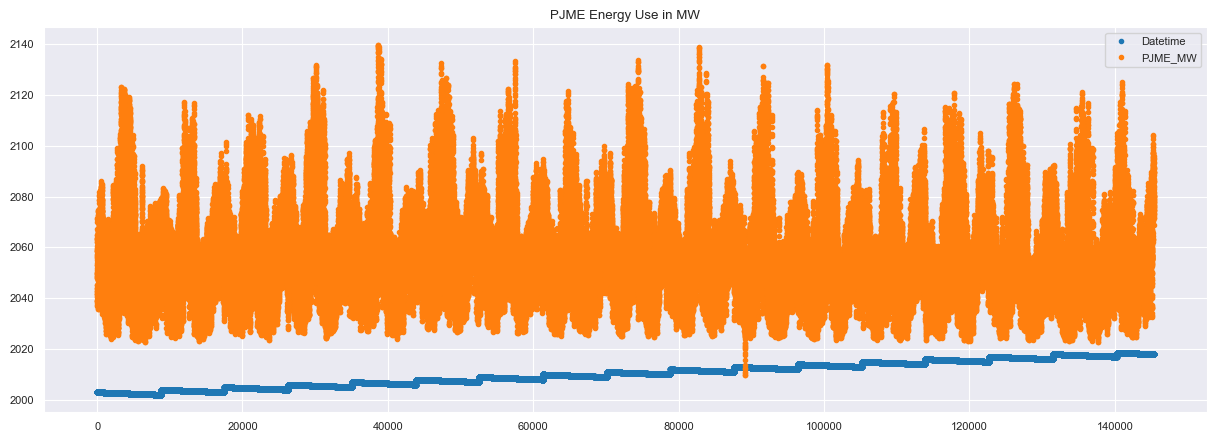

In [75]:
#Plot the main dataset to get to know what type of time sereis this is. Looks seasonal
df.plot(style='.',
        figsize=(15, 5),
        title='PJME Energy Use in MW')
plt.show()


<Axes: xlabel='Hour', ylabel='PJME_MW'>

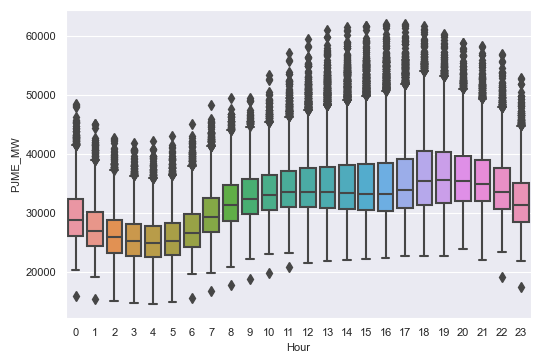

In [126]:
sns.boxplot(data=Time_series_df,x='Hour',y='PJME_MW')

<Axes: xlabel='Month', ylabel='PJME_MW'>

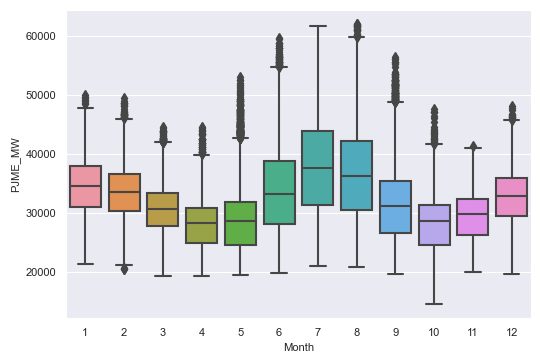

In [127]:
sns.boxplot(data=Time_series_df,x='Month',y='PJME_MW')

In [128]:
Time_series_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145366 entries, 0 to 145365
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Datetime          145366 non-null  datetime64[ns]
 1   PJME_MW           145366 non-null  float64       
 2   Year              145366 non-null  int64         
 3   Month             145366 non-null  int64         
 4   Day_of_the_month  145366 non-null  int64         
 5   Hour              145366 non-null  int64         
 6   Day_of_the_week   145366 non-null  int64         
 7   Day_of_the_year   145366 non-null  int64         
 8   Week_of_the_year  145366 non-null  int64         
 9   Quartile          145366 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(8)
memory usage: 11.1 MB


In [129]:
Time_series_df.corr()

,Datetime,PJME_MW,Year,Month,Day_of_the_month,Hour,Day_of_the_week,Day_of_the_year,Week_of_the_year,Quartile
Datetime,1.000000,-0.061119,0.998195,0.016501,0.004313,0.000030,-0.000043,0.016800,0.015990,0.016160
PJME_MW,-0.061119,1.000000,-0.058505,-0.044522,0.000077,0.486303,-0.183058,-0.044028,-0.043897,-0.045276
Year,0.998195,-0.058505,1.000000,-0.043370,-0.001326,-0.000131,-0.000035,-0.043283,-0.042424,-0.041999
Month,0.016501,-0.044522,-0.043370,1.000000,0.010323,-0.000049,-0.000086,0.996479,0.970762,0.971164
Day_of_the_month,0.004313,0.000077,-0.001326,0.010323,1.000000,-0.000089,-0.000578,0.093820,0.067612,0.012024
Hour,0.000030,0.486303,-0.000131,-0.000049,-0.000089,1.000000,0.000317,-0.000057,-0.000064,-0.000055
Day_of_the_week,-0.000043,-0.183058,-0.000035,-0.000086,-0.000578,0.000317,1.000000,-0.000138,-0.000507,0.000021
Day_of_the_year,0.016800,-0.044028,-0.043283,0.996479,0.093820,-0.000057,-0.000138,1.000000,0.972236,0.967989
Week_of_the_year,0.015990,-0.043897,-0.042424,0.970762,0.067612,-0.000064,-0.000507,0.972236,1.000000,0.946346
Quartile,0.016160,-0.045276,-0.041999,0.971164,0.012024,-0.000055,0.000021,0.967989,0.946346,1.000000


#Based purely on Pearson's correaltion, it looks like Hour and Day_of_week are only features that count but let's try a Decion tree and figure out feature importances

In [155]:
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline

In [132]:
Time_series_df1=Time_series_df.copy()

In [133]:
X=Time_series_df1.drop(['Datetime','PJME_MW'],axis=1)
y=Time_series_df1['PJME_MW']

In [145]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=DecisionTreeRegressor()
clf.fit(X_train,y_train)
importances=clf.feature_importances_
indices=importances.argsort()
top_indices=indices[::-1][:5]
print(top_indices)
feature_names=X_train.columns
feature_names[top_indices]

[3 5 0 4 6]


Index(['Hour', 'Day_of_the_year', 'Year', 'Day_of_the_week',
       'Week_of_the_year'],
      dtype='object')

So in addition to Hour and Day_of_the_week, it seems that  'Day_of_the_year', 'Year',
       'Week_of_the_year' are also features that influence the output. So these 5 features will be taken as input features

In [146]:
X1=Time_series_df1[['Hour', 'Day_of_the_year', 'Year', 'Day_of_the_week',
       'Week_of_the_year']]
y1=Time_series_df1['PJME_MW']

In [156]:
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.2,random_state=42)
pipeline=Pipeline([('scaler',StandardScaler()),('regressor',XGBRegressor())])
param_grid={'regressor__n_estimators':[100,200,300]}
grid_search=GridSearchCV(pipeline,param_grid,cv=5)
grid_search.fit(X_train,y_train)
best_model=grid_search.best_estimator_
# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)

# Print the calculated metrics
print("RMSE:", rmse)
print("MSE:", mse)
print("R-squared (R2):", r2)

RMSE: 1306.572082240253
MSE: 1707130.6060896302
R-squared (R2): 0.9585991137126121
